In [93]:
#Importing usefull libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading Dataset
apprecord=pd.read_csv("application_record.csv")

In [3]:
credrecord=pd.read_csv("credit_record.csv")


In [4]:
#Inspect Data(apprecord)
apprecord.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [5]:
#Inspect Data(Credrecord)
credrecord.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [6]:
#Checking the  number of rows and columns in both the tables
apprecord.shape

(438557, 18)

In [7]:
credrecord.shape

(1048575, 3)

As we can see from our first glance at the data, the dataset has a mixture of numerical and non-numerical features.
This can be fixed with some preprocessing, but before we do that, let's learn about the dataset a bit more to see if
there are other dataset issues that need to be fixed.

In [8]:
#As we can see there are  134203 missing the values in OCCUPATION_TYPE column
apprecord.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [9]:
credrecord.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [10]:
apprecord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [11]:
credrecord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [12]:
# Print summary statistics
apprecord.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [13]:
credrecord.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


In [14]:
#Handling the missing values in the column Occupation_Type
apprecord['OCCUPATION_TYPE'].fillna(value='0',inplace=True)

In [15]:
#As we can see now that there is no missing values in OCCUPATION_TYPE column
apprecord.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

In [16]:
#Checking Type of data (integer, float, Python object, etc.)
apprecord.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

In [17]:

apprecord.drop('FLAG_MOBIL',axis=1,inplace=True)

In [18]:
apprecord.drop_duplicates(subset=['ID']).count()

ID                     438510
CODE_GENDER            438510
FLAG_OWN_CAR           438510
FLAG_OWN_REALTY        438510
CNT_CHILDREN           438510
AMT_INCOME_TOTAL       438510
NAME_INCOME_TYPE       438510
NAME_EDUCATION_TYPE    438510
NAME_FAMILY_STATUS     438510
NAME_HOUSING_TYPE      438510
DAYS_BIRTH             438510
DAYS_EMPLOYED          438510
FLAG_WORK_PHONE        438510
FLAG_PHONE             438510
FLAG_EMAIL             438510
OCCUPATION_TYPE        438510
CNT_FAM_MEMBERS        438510
dtype: int64

In [19]:
apprecord.drop_duplicates(subset=['ID']).count()

ID                     438510
CODE_GENDER            438510
FLAG_OWN_CAR           438510
FLAG_OWN_REALTY        438510
CNT_CHILDREN           438510
AMT_INCOME_TOTAL       438510
NAME_INCOME_TYPE       438510
NAME_EDUCATION_TYPE    438510
NAME_FAMILY_STATUS     438510
NAME_HOUSING_TYPE      438510
DAYS_BIRTH             438510
DAYS_EMPLOYED          438510
FLAG_WORK_PHONE        438510
FLAG_PHONE             438510
FLAG_EMAIL             438510
OCCUPATION_TYPE        438510
CNT_FAM_MEMBERS        438510
dtype: int64

<Figure size 720x720 with 0 Axes>

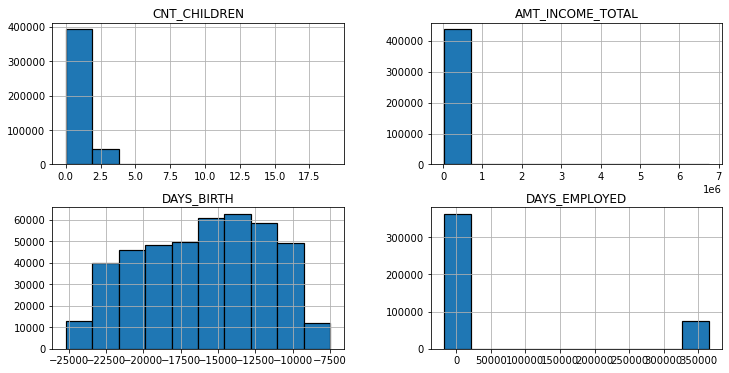

In [20]:
plt.figure(figsize=(10,10))

cols_to_plot = ["CNT_CHILDREN","AMT_INCOME_TOTAL","DAYS_BIRTH","DAYS_EMPLOYED"]
apprecord[cols_to_plot].hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)


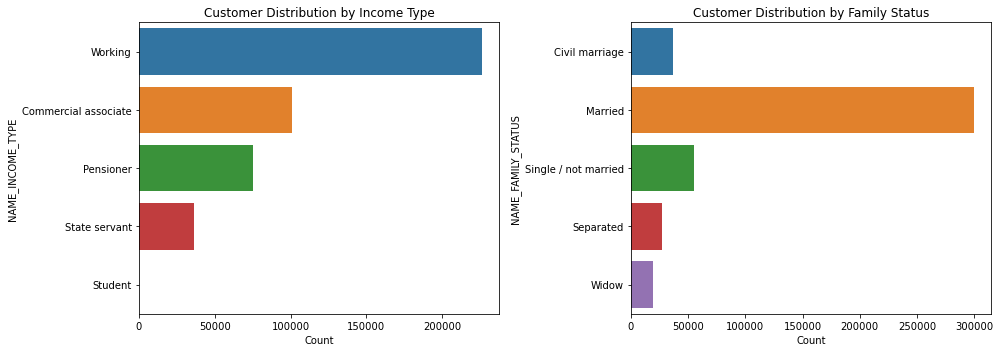

In [21]:
fig, axes = plt.subplots(1,2)

g1=sns.countplot(y=apprecord.NAME_INCOME_TYPE,linewidth=1.2, ax=axes[0])
g1.set_title("Customer Distribution by Income Type")
g1.set_xlabel("Count")

g2=sns.countplot(y=apprecord.NAME_FAMILY_STATUS,linewidth=1.2, ax=axes[1])
g2.set_title("Customer Distribution by Family Status")
g2.set_xlabel("Count")

fig.set_size_inches(14,5)

plt.tight_layout()


plt.show()


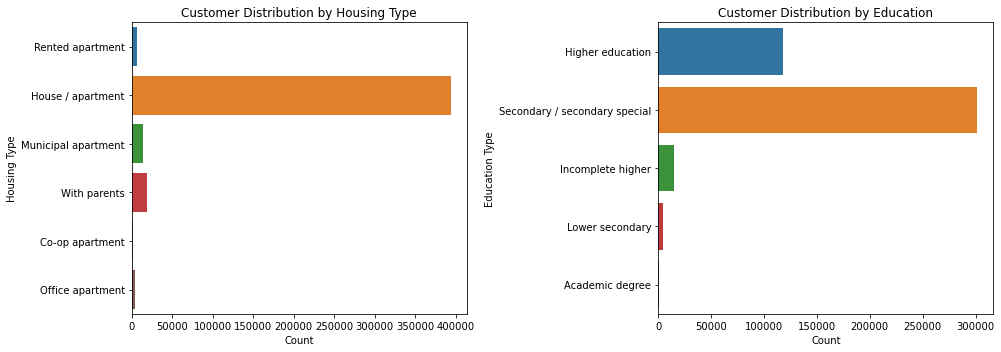

In [22]:
fig, axes = plt.subplots(1,2)

g1= sns.countplot(y=apprecord.NAME_HOUSING_TYPE,linewidth=1.2, ax=axes[0])
g1.set_title("Customer Distribution by Housing Type")
g1.set_xlabel("Count")
g1.set_ylabel("Housing Type")

g2= sns.countplot(y=apprecord.NAME_EDUCATION_TYPE, ax=axes[1])
g2.set_title("Customer Distribution by Education")
g2.set_xlabel("Count")
g2.set_ylabel("Education Type")

fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()

In [23]:

def countplot_applicants(features):
    for feature in features:
        plt.figure(figsize=(9, 9))
        ax=sns.countplot(y=apprecord[feature], hue='CODE_GENDER' , data=apprecord)
        plt.legend(loc='best')
        total = len(apprecord[feature])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

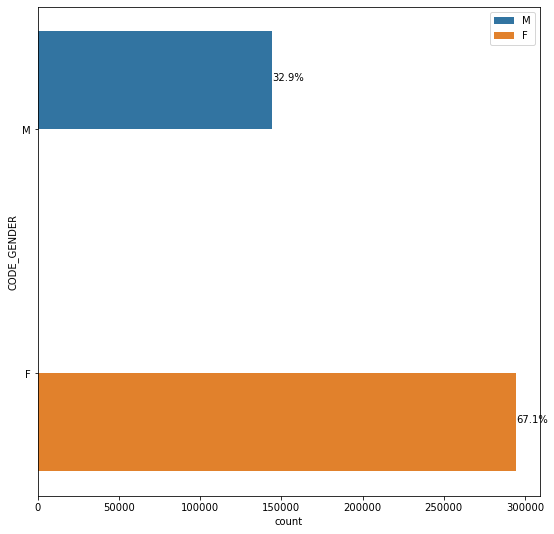

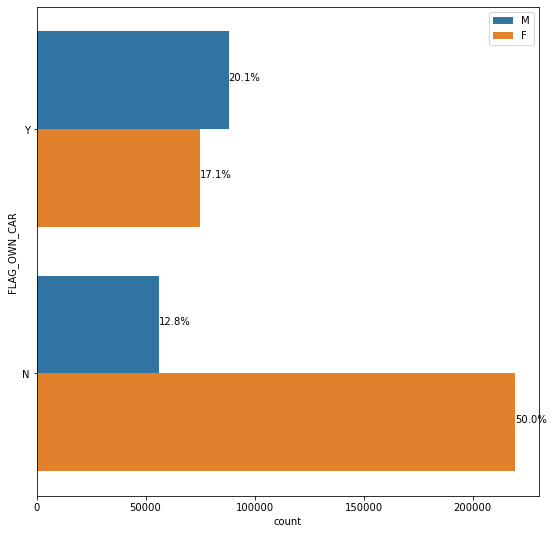

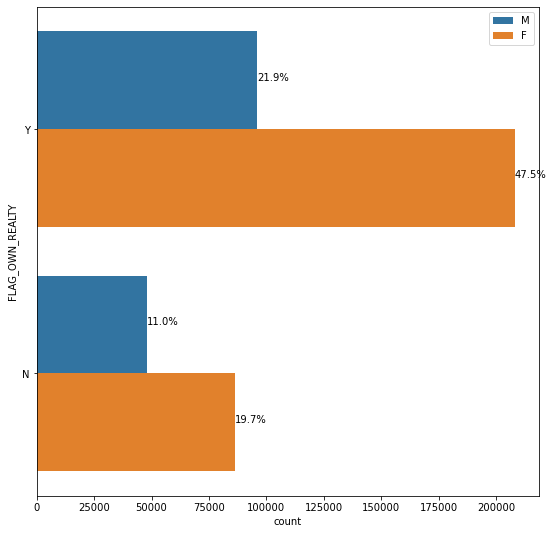

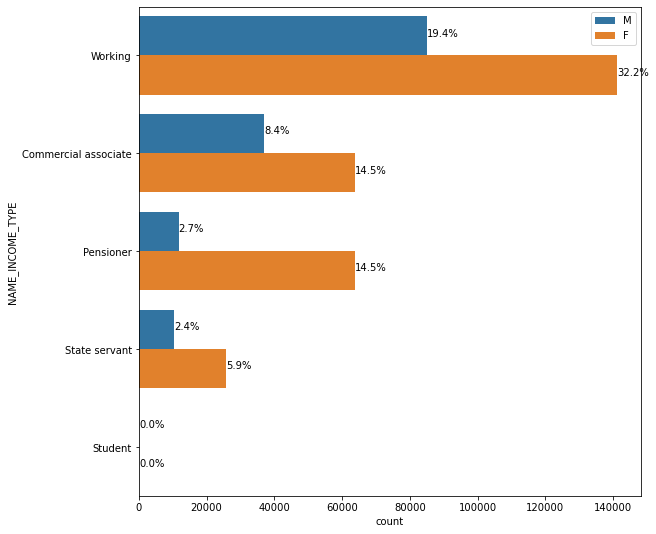

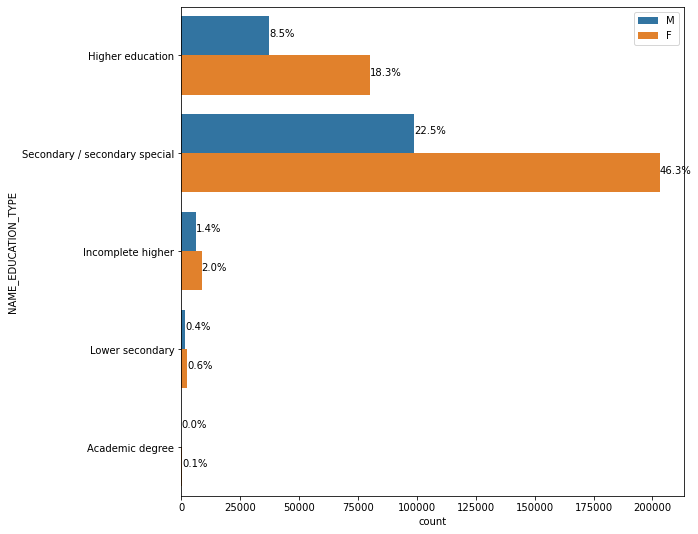

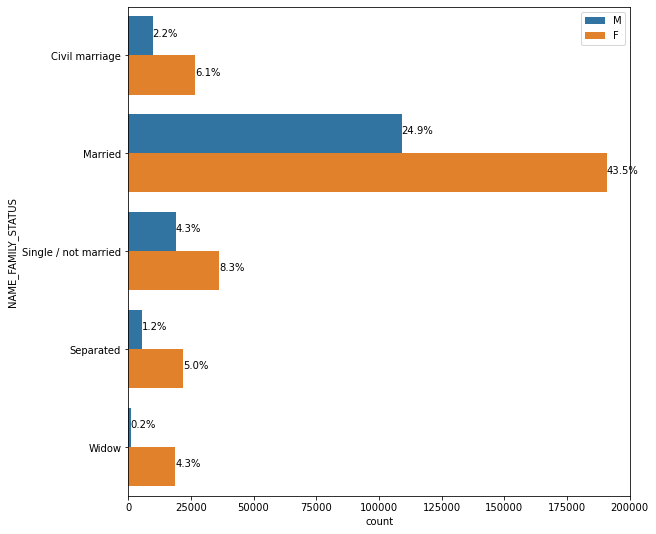

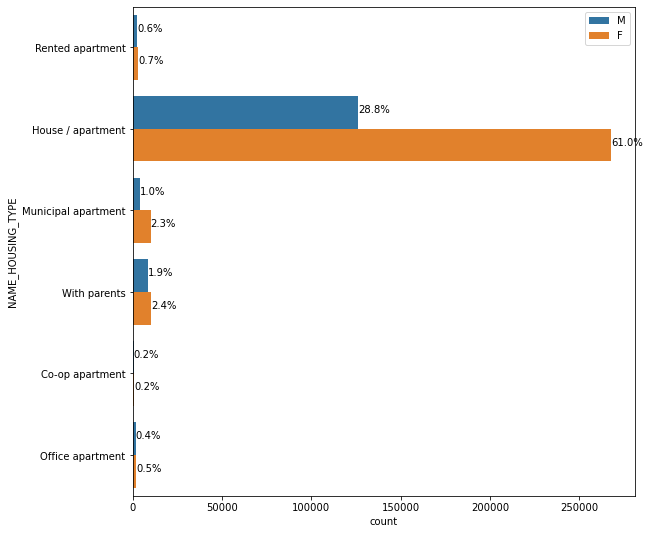

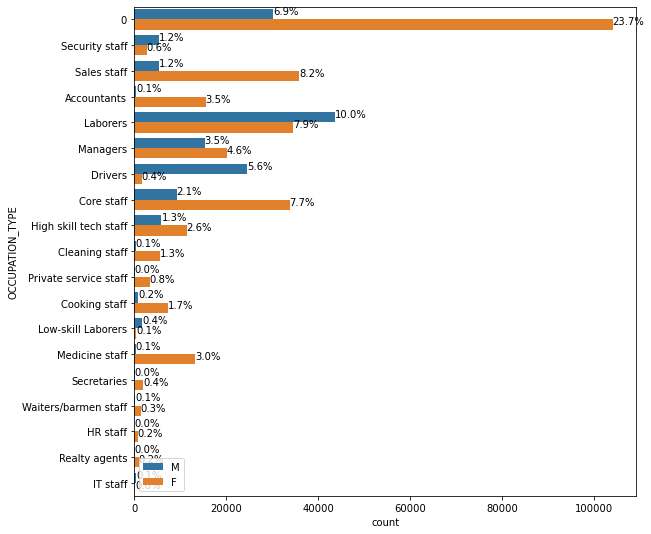

In [24]:
countplot_applicants(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'])

In [27]:

def countplot_credit(features):
    for feature in features:
        plt.figure(figsize=(9, 9))
        ax=sns.countplot(y=credrecord[feature], data=credrecord)
        total = len(credrecord[feature])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

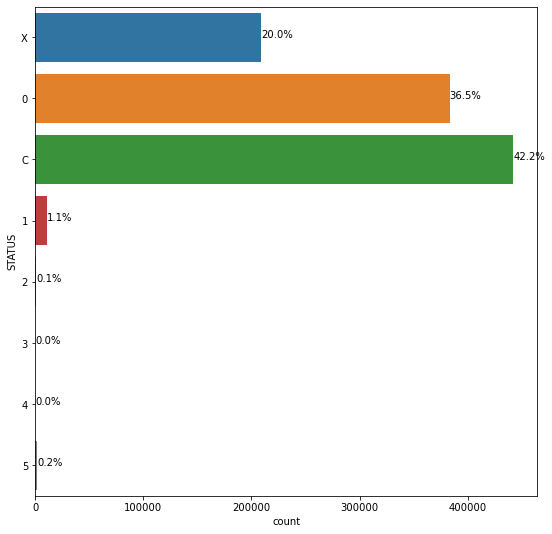

In [28]:
countplot_credit(['STATUS'])

In [29]:
apprecord.drop(['DAYS_EMPLOYED'], axis=1, inplace=True)


In [30]:
apprecord.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS'],
      dtype='object')

In [31]:
def Cat_to_Num(features):
    for feature in features:
        feature_list = list(np.unique(apprecord[feature]))
        feature_dict = {}
        for i in range(len(feature_list)):
                       feature_dict[feature_list[i]] = i
        apprecord.replace({feature : feature_dict}, inplace=True)
        print(feature, '-->', feature_dict)
        


In [32]:
categorical_features = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', 'NAME_HOUSING_TYPE', 'NAME_EDUCATION_TYPE']
Cat_to_Num(categorical_features)


CODE_GENDER --> {'F': 0, 'M': 1}
FLAG_OWN_CAR --> {'N': 0, 'Y': 1}
FLAG_OWN_REALTY --> {'N': 0, 'Y': 1}
NAME_INCOME_TYPE --> {'Commercial associate': 0, 'Pensioner': 1, 'State servant': 2, 'Student': 3, 'Working': 4}
NAME_FAMILY_STATUS --> {'Civil marriage': 0, 'Married': 1, 'Separated': 2, 'Single / not married': 3, 'Widow': 4}
OCCUPATION_TYPE --> {'0': 0, 'Accountants': 1, 'Cleaning staff': 2, 'Cooking staff': 3, 'Core staff': 4, 'Drivers': 5, 'HR staff': 6, 'High skill tech staff': 7, 'IT staff': 8, 'Laborers': 9, 'Low-skill Laborers': 10, 'Managers': 11, 'Medicine staff': 12, 'Private service staff': 13, 'Realty agents': 14, 'Sales staff': 15, 'Secretaries': 16, 'Security staff': 17, 'Waiters/barmen staff': 18}
NAME_HOUSING_TYPE --> {'Co-op apartment': 0, 'House / apartment': 1, 'Municipal apartment': 2, 'Office apartment': 3, 'Rented apartment': 4, 'With parents': 5}
NAME_EDUCATION_TYPE --> {'Academic degree': 0, 'Higher education': 1, 'Incomplete higher': 2, 'Lower secondary': 3,

In [35]:
apprecord.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,1,0,0,0,2.0
1,5008805,1,1,1,0,427500.0,4,1,0,4,-12005,1,0,0,0,2.0
2,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,0,0,0,17,2.0
3,5008808,0,0,1,0,270000.0,0,4,3,1,-19110,0,1,1,15,1.0
4,5008809,0,0,1,0,270000.0,0,4,3,1,-19110,0,1,1,15,1.0
5,5008810,0,0,1,0,270000.0,0,4,3,1,-19110,0,1,1,15,1.0
6,5008811,0,0,1,0,270000.0,0,4,3,1,-19110,0,1,1,15,1.0
7,5008812,0,0,1,0,283500.0,1,1,2,1,-22464,0,0,0,0,1.0
8,5008813,0,0,1,0,283500.0,1,1,2,1,-22464,0,0,0,0,1.0
9,5008814,0,0,1,0,283500.0,1,1,2,1,-22464,0,0,0,0,1.0


In [36]:
convert_to = {'C' : 'Good_Debt', 'X' : 'Good_Debt', '0' : 'Good_Debt', '1' : 'Neutral_Debt', '2' : 'Neutral_Debt', '3' : 'Bad_Debt', '4' : 'Bad_Debt', '5' : 'Bad_Debt'}
credrecord.replace({'STATUS' : convert_to}, inplace=True)


In [37]:
credrecord

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,Good_Debt
1,5001711,-1,Good_Debt
2,5001711,-2,Good_Debt
3,5001711,-3,Good_Debt
4,5001712,0,Good_Debt
...,...,...,...
1048570,5150487,-25,Good_Debt
1048571,5150487,-26,Good_Debt
1048572,5150487,-27,Good_Debt
1048573,5150487,-28,Good_Debt


In [ ]:
#Classifing clients with good_debt counts greater than bad_debt as eligible and vice-versa


In [38]:

credrecord['STATUS2'] = credrecord['STATUS']


In [39]:
credrecord['STATUS2'].unique()

array(['Good_Debt', 'Neutral_Debt', 'Bad_Debt'], dtype=object)

In [ ]:

#Replacing C, X, 0 with 'Good_Debt' (C: loan for that month is already paid; X: no loan for that month; 0: loan is 1 to 29 days overdue).¶
#Similarly 1, 2, 3, 4, 5 with 'Bad_Debt' (1: loan is 30 to 59 days overdue; 2: loan is 60 to 89 days overdue; 3: loan is 90 to 119 days overdue;
#4: loan is 120 to 149 days overdue; 5: loan is more than 150 days overdue).

In [40]:

credrecord = credrecord.replace({'STATUS2' :
                                          {'C' : 'Good_Debt',
                                           'X' : 'Good_Debt',
                                           '0' : 'Good_Debt',
                                           '1' : 'Bad_Debt',
                                           '2' : 'Bad_Debt',
                                           '3' : 'Bad_Debt',
                                           '4' : 'Bad_Debt',
                                           '5' : 'Bad_Debt'}})


In [41]:
credrecord.value_counts(subset=['ID', 'STATUS2']).unstack(fill_value=0)

STATUS2,Bad_Debt,Good_Debt,Neutral_Debt
ID,,,
5001711,0,4,0
5001712,0,19,0
5001713,0,22,0
5001714,0,15,0
5001715,0,60,0
...,...,...,...
5150482,0,18,0
5150483,0,18,0
5150484,0,13,0


In [42]:

credrecord = credrecord.value_counts(subset=['ID', 'STATUS2']).unstack(fill_value=0).reset_index()

In [43]:

credrecord

STATUS2,ID,Bad_Debt,Good_Debt,Neutral_Debt
0,5001711,0,4,0
1,5001712,0,19,0
2,5001713,0,22,0
3,5001714,0,15,0
4,5001715,0,60,0
...,...,...,...,...
45980,5150482,0,18,0
45981,5150483,0,18,0
45982,5150484,0,13,0
45983,5150485,0,2,0


In [ ]:
#Classifing clients with good_debt counts greater than bad_debt as eligible and vice-versa

In [45]:
credrecord.loc[(credrecord['Good_Debt'] > credrecord['Bad_Debt']), 'Status'] = 1

In [46]:
credrecord.loc[(credrecord['Good_Debt'] <= credrecord['Bad_Debt']), 'Status'] = 0

In [47]:
credrecord['Status'] = credrecord['Status'].astype(int)

In [48]:

credrecord


STATUS2,ID,Bad_Debt,Good_Debt,Neutral_Debt,Status
0,5001711,0,4,0,1
1,5001712,0,19,0,1
2,5001713,0,22,0,1
3,5001714,0,15,0,1
4,5001715,0,60,0,1
...,...,...,...,...,...
45980,5150482,0,18,0,1
45981,5150483,0,18,0,1
45982,5150484,0,13,0,1
45983,5150485,0,2,0,1


In [49]:

credrecord

STATUS2,ID,Bad_Debt,Good_Debt,Neutral_Debt,Status
0,5001711,0,4,0,1
1,5001712,0,19,0,1
2,5001713,0,22,0,1
3,5001714,0,15,0,1
4,5001715,0,60,0,1
...,...,...,...,...,...
45980,5150482,0,18,0,1
45981,5150483,0,18,0,1
45982,5150484,0,13,0,1
45983,5150485,0,2,0,1


In [ ]:
#Merging Both application_details and credit_record data

In [50]:
Final_Credit_data = apprecord.merge(credrecord, how='inner', on=['ID'])

In [51]:
Final_Credit_data.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Bad_Debt,Good_Debt,Neutral_Debt,Status
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,1,0,0,0,2.0,0,15,1,1
1,5008805,1,1,1,0,427500.0,4,1,0,4,-12005,1,0,0,0,2.0,0,14,1,1
2,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,0,0,0,17,2.0,0,30,0,1
3,5008808,0,0,1,0,270000.0,0,4,3,1,-19110,0,1,1,15,1.0,0,5,0,1
4,5008809,0,0,1,0,270000.0,0,4,3,1,-19110,0,1,1,15,1.0,0,5,0,1
5,5008810,0,0,1,0,270000.0,0,4,3,1,-19110,0,1,1,15,1.0,0,27,0,1
6,5008811,0,0,1,0,270000.0,0,4,3,1,-19110,0,1,1,15,1.0,0,39,0,1
7,5008812,0,0,1,0,283500.0,1,1,2,1,-22464,0,0,0,0,1.0,0,17,0,1
8,5008813,0,0,1,0,283500.0,1,1,2,1,-22464,0,0,0,0,1.0,0,17,0,1
9,5008814,0,0,1,0,283500.0,1,1,2,1,-22464,0,0,0,0,1.0,0,17,0,1


In [52]:
Final_Credit_data.describe()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Bad_Debt,Good_Debt,Neutral_Debt,Status
count,3.645700e+04,36457.000000,36457.000000,36457.000000,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,0.329895,0.379708,0.672189,0.430315,1.866857e+05,2.398195,3.097183,1.367885,1.282881,-15975.173382,0.225526,0.294813,0.089722,6.000576,2.198453,0.055600,21.014894,0.261898,0.998519
std,4.187524e+04,0.470181,0.485321,0.469422,0.742367,1.017892e+05,1.734032,1.341292,0.954557,0.951675,4200.549944,0.417934,0.455965,0.285787,5.404742,0.911686,0.983603,14.795793,1.036944,0.038458
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,2.700000e+04,0.000000,0.000000,0.000000,0.000000,-25152.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.042028e+06,0.000000,0.000000,0.000000,0.000000,1.215000e+05,1.000000,1.000000,1.000000,1.000000,-19438.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,9.000000,0.000000,1.000000
50%,5.074614e+06,0.000000,0.000000,1.000000,0.000000,1.575000e+05,4.000000,4.000000,1.000000,1.000000,-15563.000000,0.000000,0.000000,0.000000,5.000000,2.000000,0.000000,17.000000,0.000000,1.000000
75%,5.115396e+06,1.000000,1.000000,1.000000,1.000000,2.250000e+05,4.000000,4.000000,1.000000,1.000000,-12462.000000,0.000000,1.000000,0.000000,10.000000,3.000000,0.000000,31.000000,0.000000,1.000000
max,5.150487e+06,1.000000,1.000000,1.000000,19.000000,1.575000e+06,4.000000,4.000000,4.000000,5.000000,-7489.000000,1.000000,1.000000,1.000000,18.000000,20.000000,48.000000,61.000000,28.000000,1.000000


In [ ]:

#Splitting the credit_approval_data into training and testing sets


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X = Final_Credit_data.drop('Status', axis=1)

In [74]:

y =Final_Credit_data['Status']


In [81]:
#Splitting the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.33,
                                random_state=42)


In [82]:
#scalling the data

# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

In [ ]:
#Fitting a logistic regression model to the train set

In [83]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train, y_train)

LogisticRegression()

In [89]:
#Making predictions and evaluating performance


# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test, y_test))

# Print the confusion matrix of the logreg model
print(confusion_matrix(y_test, y_pred))

Accuracy of logistic regression classifier:  0.9987532208461475
[[    5    15]
 [    0 12011]]


In [ ]:
#Grid searching and making the model perform better

In [ ]:
#Our model was pretty good! It was able to yield an accuracy score of almost 99%.

#For the confusion matrix, the first element of the of the first row of the confusion matrix denotes the true negatives meaning the number of negative
#instances (denied applications) predicted by the model correctly. And the last element of the second row of the confusion matrix denotes the true positives 
#meaning the number of positive instances (approved applications) predicted by the model correctly.

#Let's see if we can do better. We can perform a grid search of the model parameters to improve the model's ability to predict credit card approvals.

#scikit-learn's implementation of logistic regression consists of different hyperparameters but we will grid search over the following two:

#tol
#max_iter

In [91]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol= tol, max_iter= max_iter)

In [ ]:
#Finding the best performing model
#We have defined the grid of hyperparameter values and converted them into a single dictionary format which GridSearchCV() expects as one of its parameters. Now, we will begin the grid search to see which values perform best.

#We will instantiate GridSearchCV() with our earlier logreg model with all the data we have. Instead of passing train and test sets separately, we will supply X (scaled version) and y. We will also instruct GridSearchCV() to perform a cross-validation of five folds.

#We'll end the notebook by storing the best-achieved score and the respective best parameters.

#While building this credit card predictor, we tackled some of the most widely-known preprocessing steps such as scaling and missing value imputation. We finished with some machine learning to predict if a person's application for a credit card would get approved or not given some information about that person.

In [92]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Use scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(X)

# Fit data to grid_model
grid_model_result = grid_model.fit(rescaledX, y)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.998711 using {'max_iter': 100, 'tol': 0.01}
